In [1]:
from sklearn.datasets import make_classification, load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer



import matplotlib
matplotlib.rcParams["font.family"]="Malgun Gothic"
matplotlib.rcParams["axes.unicode_minus"]= False

예측값과 실측값을 확인할 수 있도록 보여주는게 confusion matrix

In [2]:
x_data = np.array( [[25.8],[26.6],[28.1],[29.0],[30.5],
                    [31.0],[33.6],[39.3],[43.3],[45.8] ] )
y_data = np.array( [[1],[0],[0],[1],[1],[1],[1],[0],[0],[1]  ] )

In [3]:
df = pd.DataFrame( x_data, columns=['BMI'] )
df['당뇨여부'] = y_data
df


,BMI,당뇨여부
0,25.8,1
1,26.6,0
2,28.1,0
3,29.0,1
4,30.5,1
5,31.0,1
6,33.6,1
7,39.3,0
8,43.3,0
9,45.8,1


In [4]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [5]:
y_data

array([[1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1]])

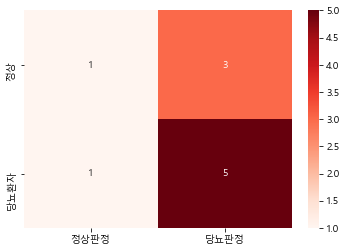

In [7]:
y_pred = [0,0,1,1,1,1,1,1,1,1] #판정
# y_data[[1,0,0,1,1,1,1,0,0,1]  ] )
cm = confusion_matrix(y_data, y_pred) #     y_true, y_pred
cm
sns.heatmap(cm, annot=True, cmap='Reds', yticklabels=['정상','당뇨환자'],
           xticklabels=['정상판정','당뇨판정'])
plt.show()
#당뇨병인데 당뇨병 예측 5개
#1종오류 2종오류 구하는 거.

정밀도와 리콜에 대해 살펴보자

Precisor 정밀도 TP/(TP+FP)를 나눈값 (오탐 비율)

Recall 재현율 TP/(TP + FN) (미탐 비율)

**F1Score(precisior, recall 조화평균) 정탐과 미탐의 비율을 따져봐야한다.**

하는 이유? 정밀도 하나만 보기엔 리스크가 있음. 조화평균으로 정밀도와 재현율의 평균을 나타냄.

In [8]:
# 정밀도
precision_score(y_data, y_pred)

0.625

In [9]:
# 재현율
recall_score(y_data, y_pred)

0.8333333333333334

In [10]:
# 오탐, 미탐의 조화평균
f1_score(y_data,y_pred)

0.7142857142857143

---
# 연습문제

피마인디안 데이터를 이용하여 confusion matrix(heat mat), 
precision, recall, f1 score  를 구하시요. (train test)

- 정보 1 : 과거 임신 횟수 (pregnant)
- 정보 2 : 포도당 부하 검사 2시간 후 공복 혈당 농도 (plasma)
- 정보 3 : 확장기 혈압 (pressure)
- 정보 4 : 삼두근 피부 주름 두께 (thickness)
- 정보 5 : 혈정 인슐린 (insulin)
- 정보 6 : 체질량 지수 (BMI)
- 정보 7 : 당뇨병 가족력 (pedigree)
- 정보 8 : 나이 (age)

​

클래스 : 당뇨( 1) , 당뇨가 아님 ( 0 )



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

df = pd.read_csv('data5/pima-indians-diabetes.data.csv')
df

x_data = df.iloc[:, :-1]
y_data = df.iloc[:, -1]

# 1,0 이 train과 test에 고르게 분포되도록 하는 옵션으로 stratify 사용
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, stratify=y_data)

model = make_pipeline(StandardScaler(), LogisticRegression())
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, cmap='Reds',annot=True)
plt.show()

print('정밀도: ', precision_score(y_test, y_pred))
print('재현율: ', recall_score(y_test, y_pred))
print('f1 score: ', f1_score(y_test, y_pred))

In [ ]:
# test
model_lr = make_pipeline(StandardScaler(), LogisticRegression())
model_lr.fit(x_train, y_train)
y_test_pred = model_lr.predict(x_test)
cm_train = confusion_matrix(y_test, y_test_pred)
plt.figure()
sns.heatmap(cm_train, annot = True, yticklabels = ['정상', '당뇨환자'], xticklabels = ['정상판정', '당뇨판정'])
plt.show()

ps = precision_score(y_test, y_test_pred)
rs = recall_score(y_test, y_test_pred)
f1score = (2 * ps * rs) / (ps + rs)
print('precision : ', precision_score(y_test, y_test_pred))
print('recall : ', recall_score(y_test, y_test_pred))
print('f1 score : ', f1score)

In [ ]:
np.linspace(0,1, 50)

In [ ]:
df = pd.read_csv('data5/pima-indians-diabetes.data.csv')
x_data = df.iloc[:, : -1]
y_data = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, stratify = y_data, 
                                                    random_state = 1)

In [ ]:
model_logistic = make_pipeline( StandardScaler(), LogisticRegression() )
param_value = {'logisticregression__C': np.linspace(0,1, 10),
               'logisticregression__penalty':['l1', 'l2', 'elasticnet', 'none']
              , 'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
gridS = GridSearchCV(model_logistic, param_grid = param_value,
                    scoring='f1' )  # accuracy
gridS.fit(x_train, y_train)

In [ ]:
gridS.best_params_

In [ ]:
gridS.best_score_ # 정확도

In [ ]:
y_predict = gridS.best_estimator_.predict(x_test)
y_predict

In [ ]:
f1_score(y_test, y_predict)

### ROC(Receiver Operating Characteristic) curve는 다양한 threshold에 대한 이진분류기의 성능을 한번에 표시한 것

In [ ]:
df = pd.read_csv('data5/pima-indians-diabetes.data.csv')
x_data = df.iloc[:, : -1]
y_data = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, stratify = y_data, 
                                                    random_state = 1)
model_lr = make_pipeline(StandardScaler(), LogisticRegression())
model_lr.fit(x_train, y_train)


In [ ]:
p = model_lr.predict_proba(x_test)
p

In [ ]:
df = pd.DataFrame([y_test])
df = df.T  # 데이터 프레임으로 돌려줌
df
# df['proba'] = p[:,1]

In [ ]:
# 컬럼 하나 추가
df['proba'] = p[:,1]
df

In [ ]:
# df정렬
df.sort_values(by='proba')

In [ ]:
# y_true, 실제값
# y_score, 확률값
# roc_curve(y_test, p[:,1])
fpr, tpr, thresholds = roc_curve(y_test, df['proba'].values)
# print( fpr)
# print(tpr)
# print(thresholds) # 판정기준치, 
plt.plot(fpr, tpr, 'r--')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
# 분류가 잘 될수록 커브가 위쪽으로 위치, 모델의 성능을 평가하는 지표 : roc_curve